# Fashion Recognition Using Deep Neural Network

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
# Load the data and split as train and test
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
# Normalization
training_images, test_images = training_images/255.0, test_images/255.0

In [5]:
# DNN model
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [6]:
# Configure the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [7]:
# Train the model
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 137us/step - loss: 0.5004 - acc: 0.8241
Epoch 2/5
60000/60000 [==============================] - 8s 137us/step - loss: 0.3792 - acc: 0.8619
Epoch 3/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.3388 - acc: 0.8770
Epoch 4/5
60000/60000 [==============================] - 9s 143us/step - loss: 0.3147 - acc: 0.8848
Epoch 5/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.2955 - acc: 0.8912


In [8]:
# Evaluate the model
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 44us/step


[0.36349144670963285, 0.8703]

# Fashion Recognition Using Convolutional Neural Network

In [10]:
mnist = tf.keras.datasets.fashion_mnist

In [11]:
# Load the data and split as train and test
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [12]:
# Reshape the data
training_images = training_images.reshape(60000, 28, 28, 1) # 60k training images 28x28 grayscale
test_images = test_images.reshape(10000, 28, 28, 1) # 10k test images 28x28 grayscale

In [13]:
# Normalization
training_images, test_images = training_images/255.0, test_images/255.0

In [14]:
# Creating the CNN model
model = tf.keras.models.Sequential()

# First convolution layer
model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(3,3),
    activation='relu',
    input_shape=(28,28,1)
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2)
))

# Second convolution layer
model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(3,3),
    activation='relu',
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2)
))

# DNN model
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [15]:
# Configure the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [16]:
# Summary of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total para

In [17]:
# Training the model
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 67s 1ms/step - loss: 0.4437 - acc: 0.8388
Epoch 2/5
60000/60000 [==============================] - 62s 1ms/step - loss: 0.3000 - acc: 0.8894
Epoch 3/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.2540 - acc: 0.9059
Epoch 4/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.2199 - acc: 0.9182
Epoch 5/5
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1934 - acc: 0.9279


In [18]:
# Evaluate the model
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 3s 339us/step


[0.27245104237794876, 0.9035]

# Visualizing the Convolutions and Pooling

* 0: T-shirt/top
* 1: Trouser
* 2: Pullover
* 3: Dress
* 4: Coat
* 5: Sandal
* 6: Shirt
* 7: Sneaker
* 8: Bag
* 9: Ankle boot

In [22]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

In [31]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


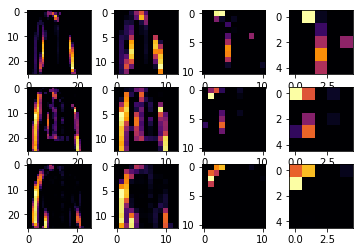

In [46]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=6
SECOND_IMAGE=10
THIRD_IMAGE=14
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
    
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)